In [1]:
# importing essential libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# important dataframes

df = activity_data,
df1 = app_publisher,
df2 = demo_info,
df3 = additional_activity_data,
main_df = activtiy data and demo_info,
final_df = activty data, demo_info data and app_publihser,
extended_df = activity_data, demo_info, app_publisher and additional_activtiy_data

In [2]:
# reading csv file
df = pd.read_csv('activity_data.csv')
df.head()

,device_id,app_name,minutes
0,1255,Snapchat (Mobile App),7.39
1,873,Pinterest (Mobile App),3.88
2,1919,Facebook (Mobile App),116.34
3,1531,Yahoo Mail (Mobile App),238.27
4,748,Netflix (Mobile App),4.59


In [3]:
# dimensions
df.shape

(22440, 3)

In [4]:
# number of null values 
df.isnull().sum()

device_id      0
app_name       0
minutes      748
dtype: int64

In [5]:
# dividing dataset on the basis of null values
test_set = df[df['minutes'].isnull()]
train_set = df[df['minutes'].notnull()]
train_set.head()

,device_id,app_name,minutes
0,1255,Snapchat (Mobile App),7.39
1,873,Pinterest (Mobile App),3.88
2,1919,Facebook (Mobile App),116.34
3,1531,Yahoo Mail (Mobile App),238.27
4,748,Netflix (Mobile App),4.59


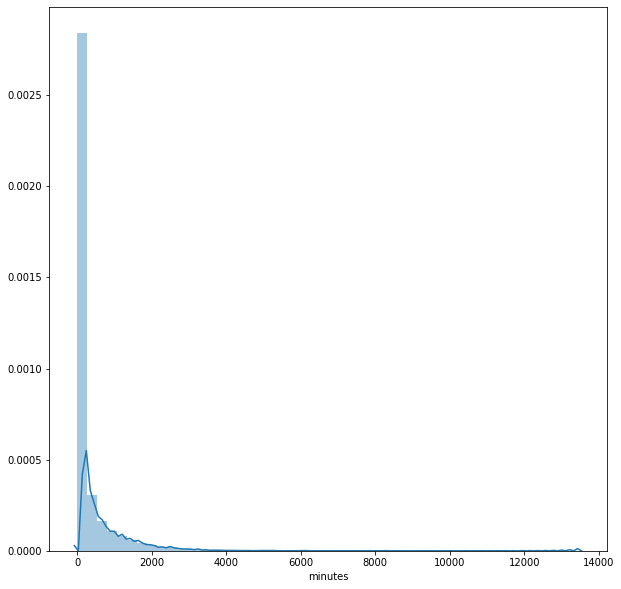

In [6]:
# distribution plot for minutes
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.distplot(train_set['minutes'])

In [7]:
# log transformation for minutes to convert it into normal distribution
log = PowerTransformer()
log.fit(train_set[['minutes']])
train_set['log_minutes'] = log.transform(train_set[['minutes']])

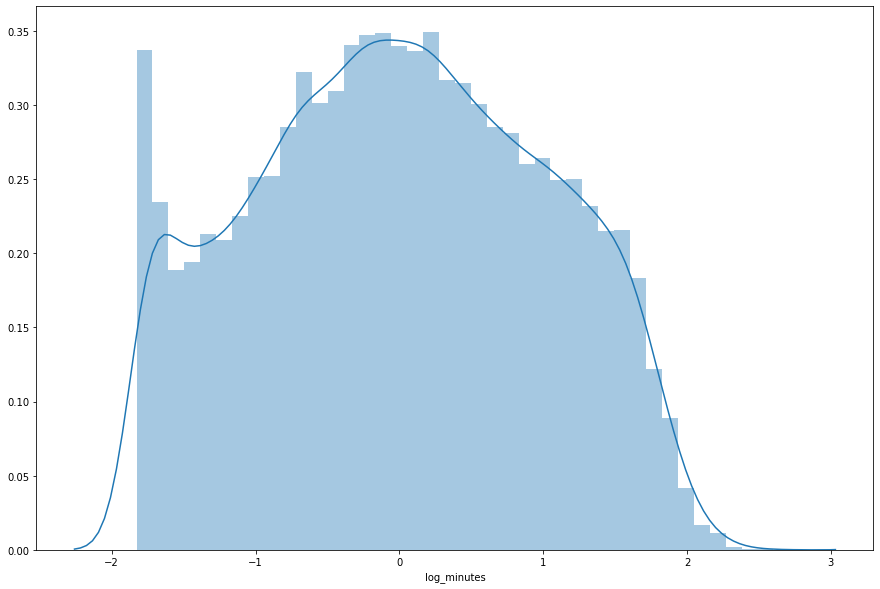

In [8]:
# distribution after log transformation
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(train_set['log_minutes'])

In [9]:
# one hot encoding for app_name
frames = [train_set, test_set]
df = pd.concat(frames)
app_name = df[['app_name','device_id']]
app_name = pd.DataFrame(app_name)
df = pd.get_dummies(df, prefix=['app_name'], columns=['app_name'])
df = df.drop(['minutes'],axis = 1)
df.head()

,device_id,log_minutes,app_name_Amazon Mobile (Mobile App),app_name_Amazon Music with Prime Music (Mobile App),app_name_Facebook (Mobile App),app_name_Facebook Messenger (Mobile App),app_name_Google Play (Mobile App),app_name_Google Search (Mobile App),app_name_GroupMe (Mobile App),app_name_Instagram (Mobile App),...,app_name_Outlook (Mobile App),app_name_Pinterest (Mobile App),app_name_Sam's Club (Mobile App),app_name_Sam's Club Scan & Go (Mobile App),app_name_Snapchat (Mobile App),app_name_Tumblr (Mobile App),app_name_Walmart (Mobile App),app_name_Yahoo Mail (Mobile App),app_name_Yahoo Newsroom (Mobile App),app_name_YouTube (Mobile App)
0,1255,-0.794722,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,873,-1.056485,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1919,0.454737,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1531,0.785250,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,748,-0.990705,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Imputing minutes values
imp_mean = IterativeImputer(random_state=42)
df = imp_mean.fit_transform(df)
df = pd.DataFrame(df)
print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64


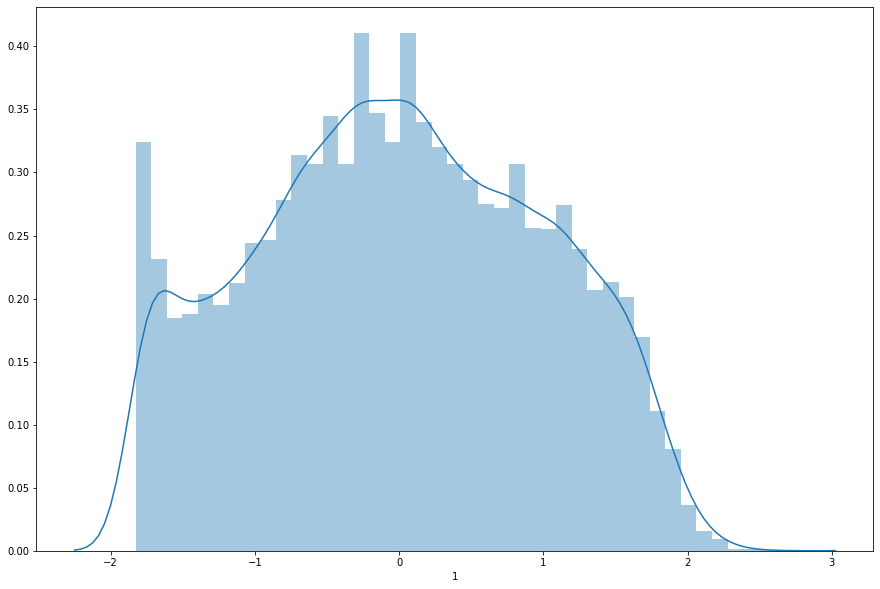

In [11]:
# distribution after imputing null values
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df[1])

In [12]:
# inverse transformation for minutes values
log_minutes = df[1].values
log_minutes = log_minutes.reshape(-1,1)
log_minutes = log.inverse_transform(log_minutes)
log_minutes = pd.DataFrame(log_minutes)
log_minutes.rename(columns = {0:'minutes'}, inplace = True)
log_minutes.head() 

,minutes
0,7.39
1,3.88
2,116.34
3,238.27
4,4.59


In [13]:
# Adding app_name column and log_minutes to dataset
df = pd.concat([df, log_minutes,app_name], axis=1)
df.drop(df.iloc[:, 0:23], inplace = True, axis = 1) 
df.head()

,minutes,app_name,device_id
0,7.39,Snapchat (Mobile App),1255
1,3.88,Pinterest (Mobile App),873
2,116.34,Facebook (Mobile App),1919
3,238.27,Yahoo Mail (Mobile App),1531
4,4.59,Netflix (Mobile App),748


In [14]:
# checking for null values in new dataset
df.isnull().sum()

minutes      0
app_name     0
device_id    0
dtype: int64

# trying other methods for imputing null values
Y = train_set[2]
X = train_set.drop([1,2],axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(Y_test, Y_pred)
r2_score(Y_test, Y_pred)

In [15]:
# reading app_publisher csv
df1 = pd.read_csv('app_publisher.csv')
df1

,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites
5,Netflix (Mobile App),Netflix Inc.
6,Tumblr (Mobile App),Oath
7,Facebook Messenger (Mobile App),Facebook
8,Kindle (Mobile App),Amazon Sites
9,GroupMe (Mobile App),Microsoft Sites


In [16]:
# reading demo_info csv
df2 = pd.read_csv('demo_info.csv')
df2.isnull().sum()

device_id     0
gender_id    98
dtype: int64

In [17]:
# reading additional activity csv
df3 = pd.read_csv('additional_activity_data.csv')
df3.isnull().sum()

app_name         0
total_devices    0
minutes          0
dtype: int64

In [18]:
# Joining dataset
main_df = pd.merge(df,df2,on = 'device_id', how = 'inner')
app_name1 = main_df[['device_id','app_name']]
main_df.isnull().sum()

minutes        0
app_name       0
device_id      0
gender_id    781
dtype: int64

In [19]:
# one hot encoding for app_name
main_df1 = pd.get_dummies(main_df, prefix=['app_name'], columns=['app_name'])
main_df1.head()

,minutes,device_id,gender_id,app_name_Amazon Mobile (Mobile App),app_name_Amazon Music with Prime Music (Mobile App),app_name_Facebook (Mobile App),app_name_Facebook Messenger (Mobile App),app_name_Google Play (Mobile App),app_name_Google Search (Mobile App),app_name_GroupMe (Mobile App),...,app_name_Outlook (Mobile App),app_name_Pinterest (Mobile App),app_name_Sam's Club (Mobile App),app_name_Sam's Club Scan & Go (Mobile App),app_name_Snapchat (Mobile App),app_name_Tumblr (Mobile App),app_name_Walmart (Mobile App),app_name_Yahoo Mail (Mobile App),app_name_Yahoo Newsroom (Mobile App),app_name_YouTube (Mobile App)
0,7.39,1255,2.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.46,1255,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,14.84,1255,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.28,1255,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,42.69,1255,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# dividing dataset on the basis of null values
set1 = main_df1[main_df1['gender_id'].isnull()]
set2 = main_df1[main_df1['gender_id'].notnull()]
set1.head()

,minutes,device_id,gender_id,app_name_Amazon Mobile (Mobile App),app_name_Amazon Music with Prime Music (Mobile App),app_name_Facebook (Mobile App),app_name_Facebook Messenger (Mobile App),app_name_Google Play (Mobile App),app_name_Google Search (Mobile App),app_name_GroupMe (Mobile App),...,app_name_Outlook (Mobile App),app_name_Pinterest (Mobile App),app_name_Sam's Club (Mobile App),app_name_Sam's Club Scan & Go (Mobile App),app_name_Snapchat (Mobile App),app_name_Tumblr (Mobile App),app_name_Walmart (Mobile App),app_name_Yahoo Mail (Mobile App),app_name_Yahoo Newsroom (Mobile App),app_name_YouTube (Mobile App)
544,76.09,775,NaN,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545,1.76,775,NaN,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546,467.64,775,NaN,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
547,2.26,775,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
548,11.03,775,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Decision tree classifier for imputing null values for gender_id
Y1 = set2['gender_id']
X1 = set2.drop(['gender_id'],axis = 1)

X_train, X_val, Y_train, Y_val = train_test_split(X1, Y1, test_size=0.20, random_state=42)


model = tree.DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
# predition of validation set and checking accuracy
y_pred=model.predict(X_val)
cnf_matrix = metrics.confusion_matrix(Y_val, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(Y_val, y_pred))

[[1460  194]
 [ 142 2536]]
Accuracy: 0.9224376731301939


In [23]:
# grid search for hyperparameter tuning 
param_grid = {'min_samples_split': np.arange(2,15),'criterion':['gini','entropy']}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(X_train, Y_train)

tree_preds = tree.predict_proba(X_val)[:, 1]
tree_performance = metrics.accuracy_score(Y_val, y_pred)
print(tree_performance)
print(tree.best_params_)

0.9224376731301939
{'criterion': 'entropy', 'min_samples_split': 3}


# knn classifer
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_val)
knn_score = metrics.accuracy_score(Y_val, y_pred)
knn_score

In [24]:
# prediciting null values using decision tree classfier
Y_test = set1['gender_id']
X_test = set1.drop(['gender_id'],axis = 1)
test_pred = model.predict(X_test)
set1 = set1.drop(['gender_id'],axis = 1)
set1['gender_id'] = test_pred
set1.isnull().sum()

minutes                                                0
device_id                                              0
app_name_Amazon Mobile (Mobile App)                    0
app_name_Amazon Music with Prime Music (Mobile App)    0
app_name_Facebook (Mobile App)                         0
app_name_Facebook Messenger (Mobile App)               0
app_name_Google Play (Mobile App)                      0
app_name_Google Search (Mobile App)                    0
app_name_GroupMe (Mobile App)                          0
app_name_Instagram (Mobile App)                        0
app_name_Kindle (Mobile App)                           0
app_name_Microsoft Word (Mobile App)                   0
app_name_Netflix (Mobile App)                          0
app_name_Outlook (Mobile App)                          0
app_name_Pinterest (Mobile App)                        0
app_name_Sam's Club (Mobile App)                       0
app_name_Sam's Club Scan & Go (Mobile App)             0
app_name_Snapchat (Mobile App) 

In [25]:
# combining dataset
frames_set = [set2, set1]
main_df2 = pd.concat(frames_set)
main_df2.head()

,app_name_Amazon Mobile (Mobile App),app_name_Amazon Music with Prime Music (Mobile App),app_name_Facebook (Mobile App),app_name_Facebook Messenger (Mobile App),app_name_Google Play (Mobile App),app_name_Google Search (Mobile App),app_name_GroupMe (Mobile App),app_name_Instagram (Mobile App),app_name_Kindle (Mobile App),app_name_Microsoft Word (Mobile App),...,app_name_Sam's Club Scan & Go (Mobile App),app_name_Snapchat (Mobile App),app_name_Tumblr (Mobile App),app_name_Walmart (Mobile App),app_name_Yahoo Mail (Mobile App),app_name_Yahoo Newsroom (Mobile App),app_name_YouTube (Mobile App),device_id,gender_id,minutes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1255,2.0,7.39
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1255,2.0,0.46
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1255,2.0,14.84
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1255,2.0,4.28
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1255,2.0,42.69


In [26]:
# joining dataset and checking for null values
main_df3 = pd.concat([main_df2,app_name1],axis = 1)
main_df3.isnull().sum()

app_name_Amazon Mobile (Mobile App)                    0
app_name_Amazon Music with Prime Music (Mobile App)    0
app_name_Facebook (Mobile App)                         0
app_name_Facebook Messenger (Mobile App)               0
app_name_Google Play (Mobile App)                      0
app_name_Google Search (Mobile App)                    0
app_name_GroupMe (Mobile App)                          0
app_name_Instagram (Mobile App)                        0
app_name_Kindle (Mobile App)                           0
app_name_Microsoft Word (Mobile App)                   0
app_name_Netflix (Mobile App)                          0
app_name_Outlook (Mobile App)                          0
app_name_Pinterest (Mobile App)                        0
app_name_Sam's Club (Mobile App)                       0
app_name_Sam's Club Scan & Go (Mobile App)             0
app_name_Snapchat (Mobile App)                         0
app_name_Tumblr (Mobile App)                           0
app_name_Walmart (Mobile App)  

In [27]:
# droping gender_id
main_df3.drop(main_df3.iloc[:, :21], inplace = True, axis = 1) 
main_df3.head()

,device_id,gender_id,minutes,device_id,app_name
0,1255,2.0,7.39,1255,Snapchat (Mobile App)
1,1255,2.0,0.46,1255,Pinterest (Mobile App)
2,1255,2.0,14.84,1255,Instagram (Mobile App)
3,1255,2.0,4.28,1255,Tumblr (Mobile App)
4,1255,2.0,42.69,1255,YouTube (Mobile App)


In [28]:
# joining all dataset and forming final dataframe
final_df = pd.merge(df1,main_df3,on = 'app_name', how = 'inner')
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df.head()

,app_name,Publisher,device_id,gender_id,minutes
0,Walmart (Mobile App),Wal-Mart,873,2.0,39.92
1,Walmart (Mobile App),Wal-Mart,748,1.0,492.68
2,Walmart (Mobile App),Wal-Mart,993,2.0,483.68
3,Walmart (Mobile App),Wal-Mart,438,1.0,171.19
4,Walmart (Mobile App),Wal-Mart,2231,2.0,2.03


In [29]:
# checking for null values
final_df.isnull().sum()

app_name     0
Publisher    0
device_id    0
gender_id    0
minutes      0
dtype: int64

In [30]:
# dimensions
final_df.shape

(22440, 5)

In [31]:
# grouping on publisher
pub_df = final_df.groupby(['Publisher']).sum()
pub_df.sort_values(by = ['minutes'], ascending = False)

,device_id,gender_id,minutes
Publisher,,,
Google Sites,11056508,12854.0,2.227023e+06
Facebook,9268406,10804.0,1.800332e+06
Amazon Sites,3106207,3730.0,6.127105e+05
"Snapchat, Inc",1848099,2100.0,3.701590e+05
Oath,1287599,1501.0,2.781774e+05
Pinterest,1304904,1698.0,2.529964e+05
Netflix Inc.,1122283,1314.0,2.275180e+05
Wal-Mart,1191903,1484.0,2.144630e+05
Microsoft Sites,989126,1144.0,1.952255e+05


In [32]:
# reseting index
pub_df = pub_df.reset_index()

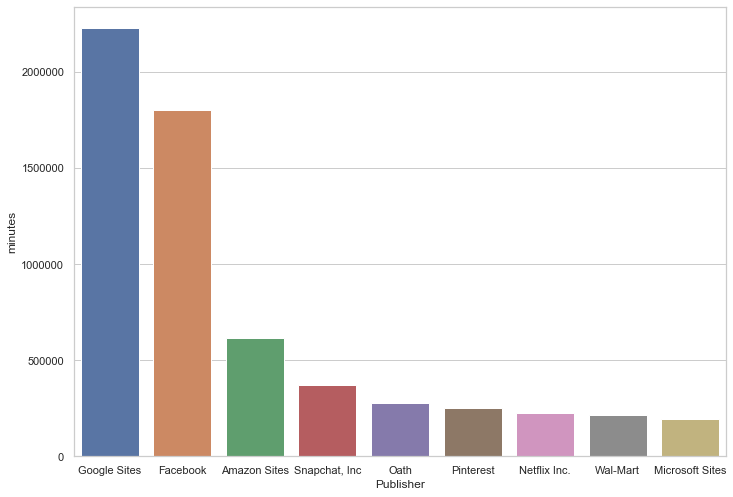

In [33]:
# plot for total minutes spend on each publisher
pub_df = pub_df.sort_values(by = ['minutes'],ascending = False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
ax = sns.barplot(x="Publisher",y = "minutes",data=pub_df)

In [34]:
# grouping on applications
app_df = final_df.groupby(['app_name']).sum()
app_df = app_df.reset_index()
app_df = app_df.sort_values(by = ['minutes'], ascending = False)
app_df

,app_name,device_id,gender_id,minutes
4,Google Play (Mobile App),3831018,4466.0,789754.911267
5,Google Search (Mobile App),3671369,4270.0,759879.273938
2,Facebook (Mobile App),3407120,3987.0,712347.677547
20,YouTube (Mobile App),3554121,4118.0,677388.361733
3,Facebook Messenger (Mobile App),3499277,4108.0,677343.847586
0,Amazon Mobile (Mobile App),2243787,2647.0,456434.930899
7,Instagram (Mobile App),2362009,2709.0,410640.932064
15,Snapchat (Mobile App),1848099,2100.0,370159.010960
12,Pinterest (Mobile App),1304904,1698.0,252996.437248
10,Netflix (Mobile App),1122283,1314.0,227518.025905


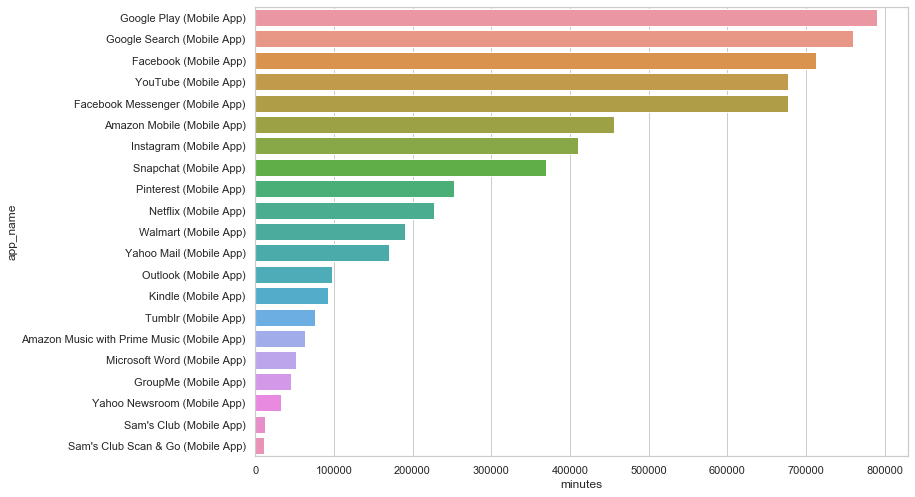

In [35]:
# plot for total minutes spend on application
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
ax = sns.barplot(x="minutes",y = "app_name",data=app_df)

In [36]:
# grouping on device id and finding top 10 device spending most time on smart phones
device_df = final_df.groupby(['device_id']).sum()
device_df = device_df.reset_index()
device_top10 = device_df.nlargest(10, 'minutes')
device_top10 = device_top10.sort_values(by = ['minutes'], ascending = False)
device_top10

,device_id,gender_id,minutes
183,184,18.0,14778.910000
651,652,28.0,12210.810000
2605,2606,9.0,11481.717787
1118,1119,6.0,10928.820000
810,811,10.0,10577.220000
692,693,18.0,10239.560000
783,784,8.0,9519.740000
1148,1149,18.0,9441.810000
418,419,24.0,9383.582126
1854,1855,18.0,9304.800727


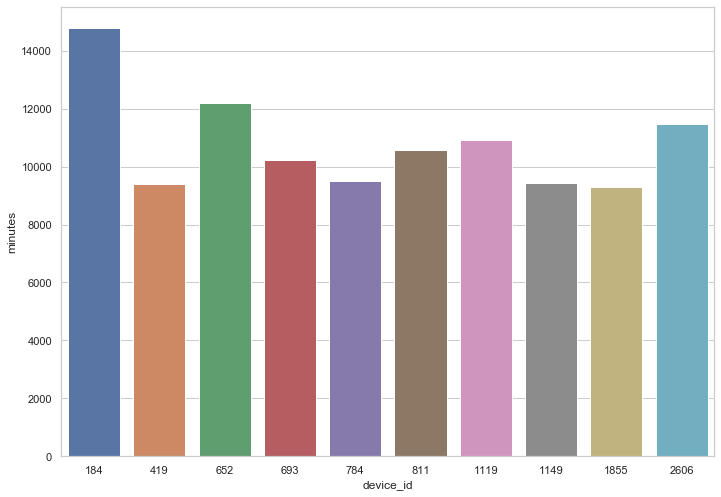

In [37]:
# plot for top 10 device id spending most minutes
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
ax = sns.barplot(x="device_id",y = "minutes",data=device_top10)

In [38]:
# grouping by gender id 
gen_df = final_df.groupby(['gender_id']).sum()
gen_df = gen_df.sort_values(by = ['minutes'], ascending = False)
gen_df = gen_df.reset_index()
gen_df

,gender_id,device_id,minutes
0,2.0,19643570,3.862559e+06
1,1.0,11531465,2.316045e+06


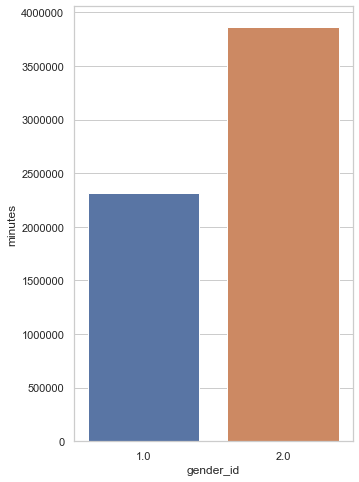

In [39]:
# plot for which gender spends more time on smart phones 1: male and 2: female
sns.set(rc={'figure.figsize':(5,8)})
sns.set(style="whitegrid")
ax = sns.barplot(x="gender_id",y = "minutes",data=gen_df)

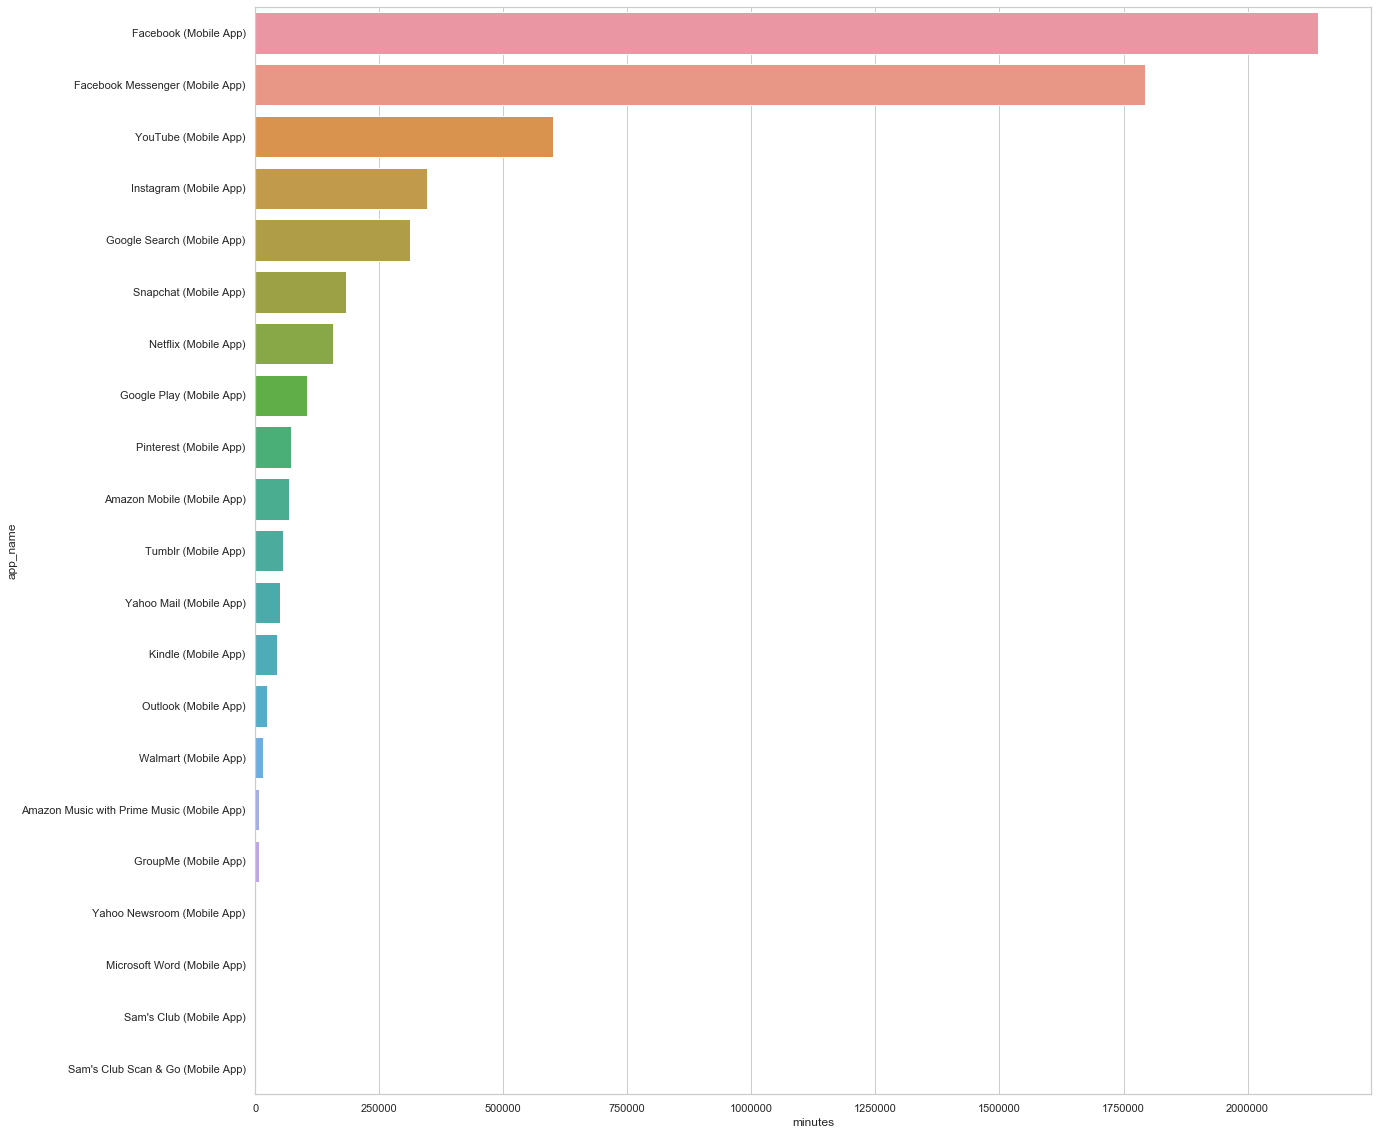

In [40]:
# total monthly minutes spend on each appication using additional activity data
df3 = df3.sort_values(by = ['minutes'], ascending = False)
sns.set(rc={'figure.figsize':(20,20)})
sns.set(style="whitegrid")
ax = sns.barplot(x="minutes",y = "app_name",data=df3)

In [41]:
# creating new column for average time spend on each appication
df3['avg_time_per_device'] = df3['minutes']/df3['total_devices']
df3_sorted = df3.sort_values(by=['avg_time_per_device'],ascending = False)
df3_sorted

,app_name,total_devices,minutes,avg_time_per_device
2,Facebook (Mobile App),2672,2141691.64,801.531302
4,Facebook Messenger (Mobile App),2722,1792877.26,658.661741
19,Tumblr (Mobile App),233,57047.92,244.840858
14,YouTube (Mobile App),2763,599422.24,216.946160
8,Netflix (Mobile App),783,157384.61,201.002056
18,Instagram (Mobile App),1776,346829.87,195.287089
15,Snapchat (Mobile App),1346,183969.89,136.678967
0,Kindle (Mobile App),379,43521.39,114.832164
17,Google Search (Mobile App),2909,311777.26,107.176782
10,Yahoo Mail (Mobile App),679,49796.16,73.337496


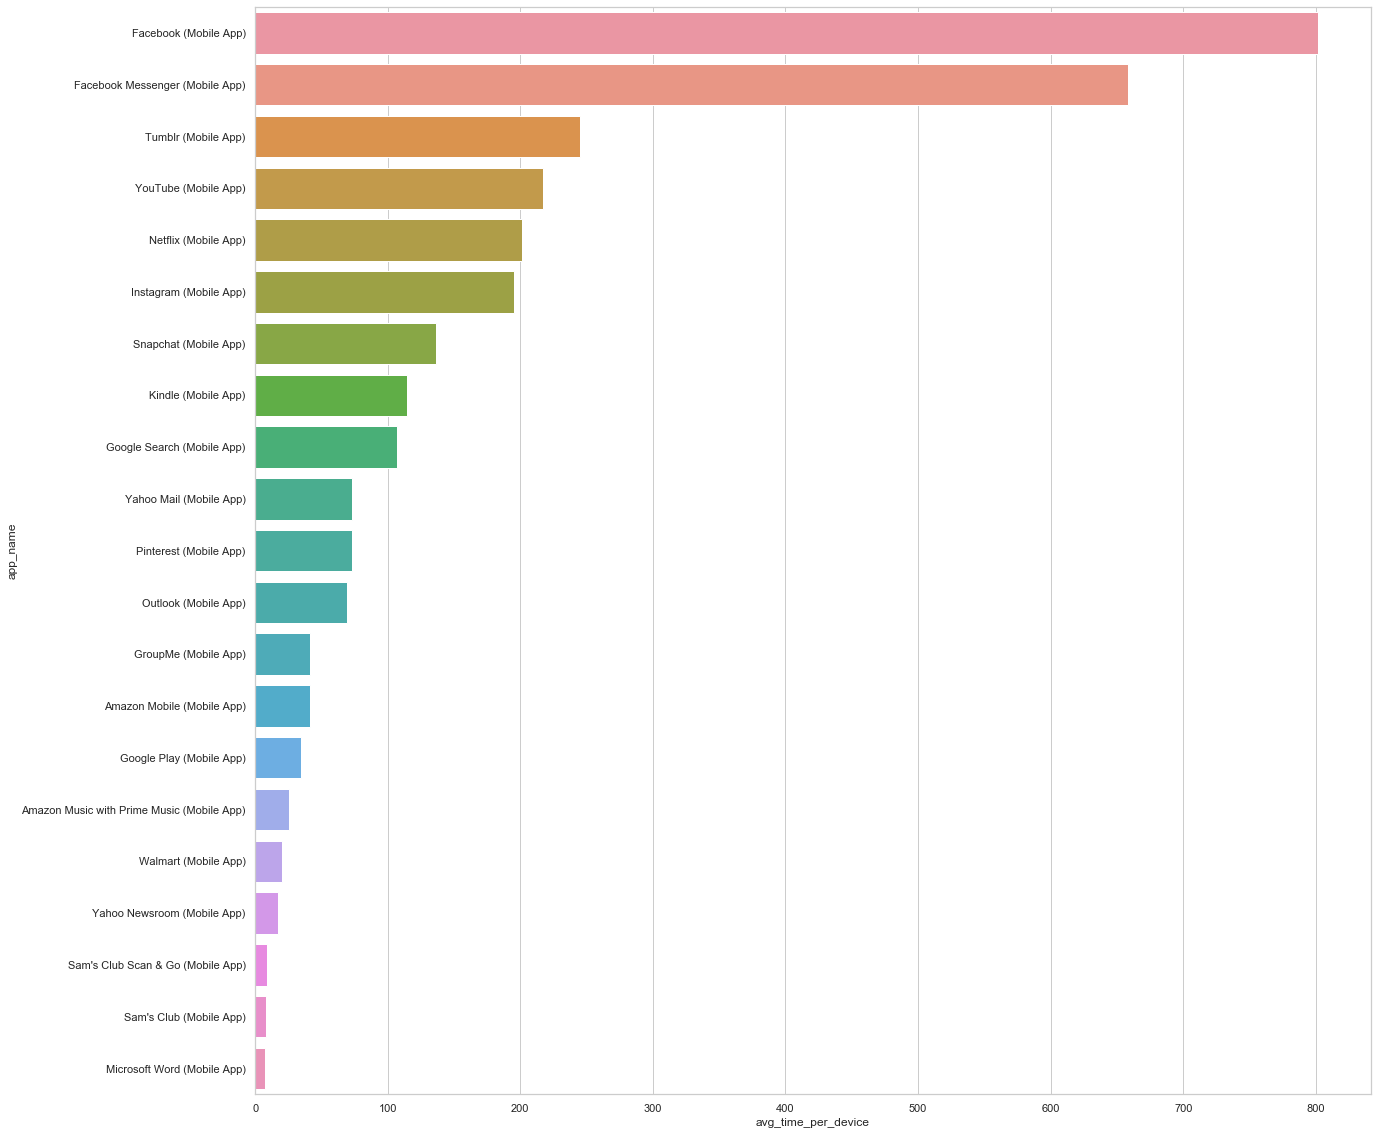

In [42]:
# plot for average time spend on each application
sns.set(rc={'figure.figsize':(20,20)})
sns.set(style="whitegrid")
ax = sns.barplot(x="avg_time_per_device",y = "app_name",data=df3_sorted)

In [43]:
# Joining additonal activity data with final_df
extended_df = pd.merge(final_df,df3_sorted,on = 'app_name', how = 'inner')
extended_df.isnull().sum()

app_name               0
Publisher              0
device_id              0
gender_id              0
minutes_x              0
total_devices          0
minutes_y              0
avg_time_per_device    0
dtype: int64

In [44]:
extended_df.head()

,app_name,Publisher,device_id,gender_id,minutes_x,total_devices,minutes_y,avg_time_per_device
0,Walmart (Mobile App),Wal-Mart,873,2.0,39.92,792,16149.21,20.390417
1,Walmart (Mobile App),Wal-Mart,748,1.0,492.68,792,16149.21,20.390417
2,Walmart (Mobile App),Wal-Mart,993,2.0,483.68,792,16149.21,20.390417
3,Walmart (Mobile App),Wal-Mart,438,1.0,171.19,792,16149.21,20.390417
4,Walmart (Mobile App),Wal-Mart,2231,2.0,2.03,792,16149.21,20.390417


In [45]:
# grouping on publisher and gender
gen_pub_df = extended_df.groupby(['Publisher','gender_id']).sum()
gen_pub_df = gen_pub_df.reset_index()
gen_pub_df = gen_pub_df.sort_values(by = ['minutes_x'],ascending = False)
gen_pub_df

,Publisher,gender_id,device_id,minutes_x,total_devices,minutes_y,avg_time_per_device
5,Google Sites,2.0,6766142,1.360461e+06,14215393,1.621502e+09,5.720535e+05
3,Facebook,2.0,5719758,1.142481e+06,10234548,6.480769e+09,2.473143e+06
4,Google Sites,1.0,4290366,8.665610e+05,8878328,1.021858e+09,3.606913e+05
2,Facebook,1.0,3548648,6.578515e+05,6177328,3.882088e+09,1.484234e+06
1,Amazon Sites,2.0,2034286,3.814393e+05,1871762,8.370744e+07,7.705689e+04
0,Amazon Sites,1.0,1071921,2.312712e+05,1071862,4.593843e+07,3.631167e+04
15,"Snapchat, Inc",2.0,1095449,2.115179e+05,1053918,1.440484e+08,1.070196e+05
13,Pinterest,2.0,1063876,2.026491e+05,756200,5.519443e+07,5.547179e+04
14,"Snapchat, Inc",1.0,752650,1.586411e+05,718764,9.823992e+07,7.298657e+04
11,Oath,2.0,760439,1.570198e+05,308333,2.645637e+07,5.605842e+04


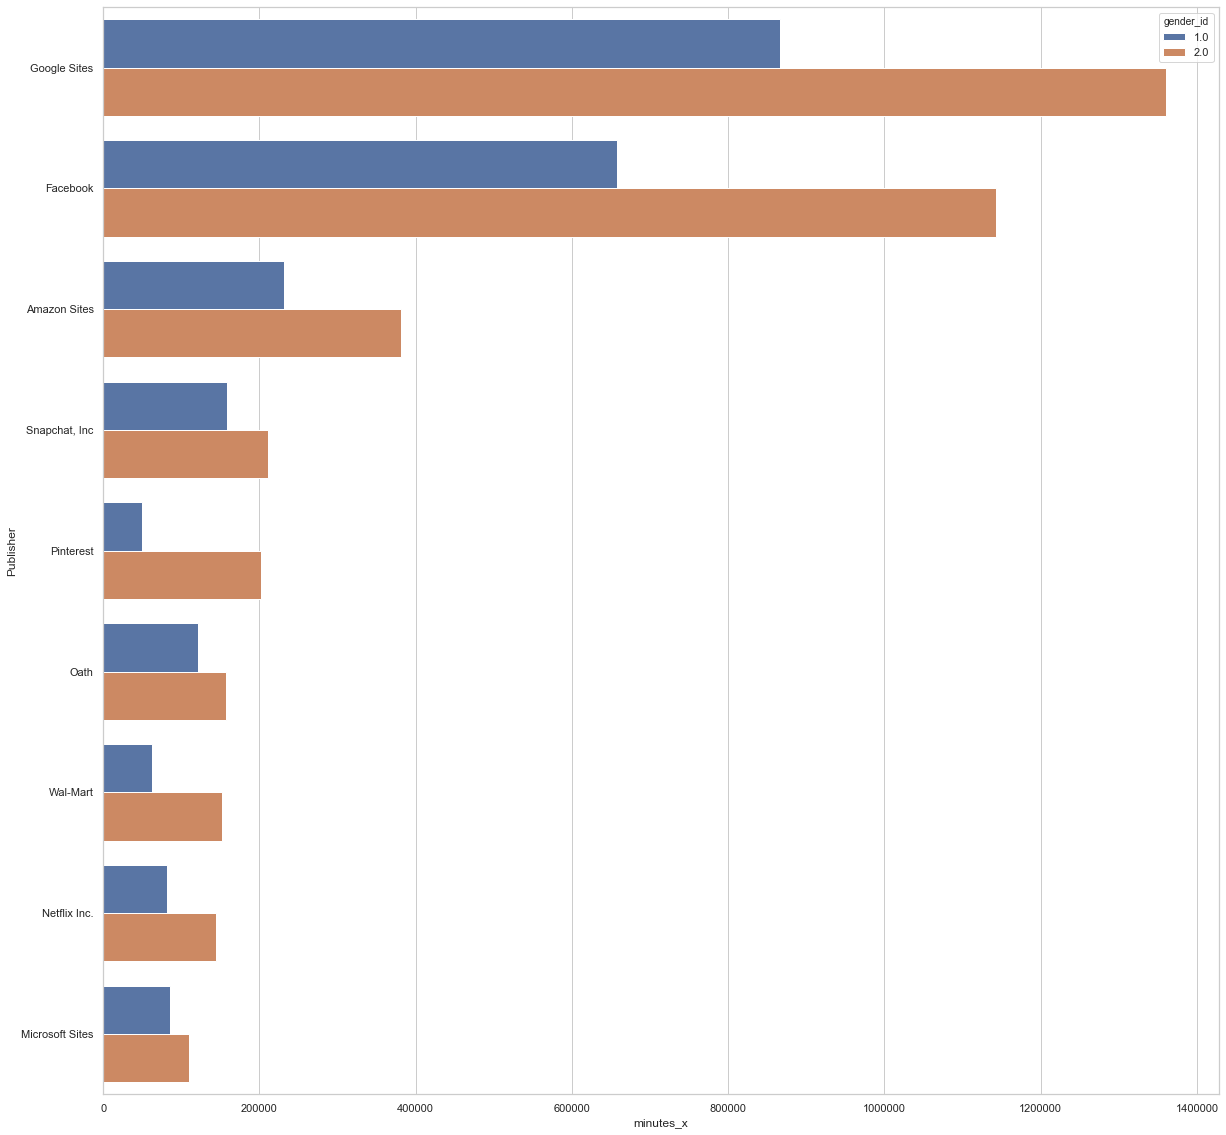

In [46]:
# plot showing time spend by each gender on publisher
sns.set(rc={'figure.figsize':(20,20)})
sns.set(style="whitegrid")
ax = sns.barplot(x="minutes_x",y = "Publisher",hue = "gender_id",data=gen_pub_df)

In [47]:
# Outliers
# calculate interquartile range
q25, q75 = percentile(final_df['minutes'], 25), percentile(final_df['minutes'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in final_df['minutes'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# non outliers
non_outliers = [x for x in final_df['minutes'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(non_outliers))

Percentiles: 25th=8.310, 75th=238.695, IQR=230.385
Identified outliers: 3121
Non-outlier observations: 19319


In [48]:
outliers

[1171.7799999999966,
 611.540000000002,
 994.45,
 733.260000000002,
 750.990000000002,
 2341.57,
 651.7199999999985,
 655.1099999999988,
 2391.8600000000056,
 1283.7299999999943,
 859.4700000000007,
 1377.9900000000016,
 637.3099999999985,
 721.8900000000008,
 1461.6599999999976,
 2224.130000000005,
 697.1099999999973,
 1983.6600000000028,
 1596.98,
 2034.030000000008,
 1118.700000000002,
 899.0299999999978,
 1366.130000000003,
 3091.9000000000115,
 5109.630000000013,
 1519.9500000000032,
 809.3400000000026,
 2463.65,
 877.1500000000042,
 1672.6599999999926,
 1453.8400000000001,
 1375.7399999999982,
 2706.819999999991,
 1164.8299999999974,
 1138.1599999999996,
 712.859999999997,
 617.710000000002,
 605.1899999999978,
 641.4999999999984,
 851.1399999999993,
 1416.7199999999996,
 1258.9599999999948,
 2344.330000000011,
 1590.8300000000033,
 1405.530000000006,
 2129.680000000001,
 830.0600000000004,
 1744.1799999999996,
 1914.3899999999935,
 1165.3100000000043,
 849.3999999999977,
 587.17